In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, SimpleRNN

In [2]:
db = pd.read_csv('./campaign1.csv')
db.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [4]:
db.drop(['campaign_item_id', 
         'ext_service_id', 
         'creative_id',
         'advertiser_id',
         'channel_id', 
         'channel_name', 
         'timezone', 
         'search_tags', 
         'template_id', 
         'network_margin', 
         'exchange_rate', 
         'network_id', 
         'landing_page',
         'cmi_currency_code',
         'advertiser_name', 
         'keywords',
         'search_tag_cat',
         'stats_currency',
         'position_in_content',
         'total_reach',
         'max_bid_cpm',
         'unique_reach' 
         ], axis=1, inplace=True)
db

,no_of_days,time,ext_service_name,creative_width,creative_height,approved_budget,advertiser_currency,campaign_budget_usd,impressions,clicks,currency_code,media_cost_usd,weekday_cat
0,7,2022-05-01,Facebook Ads,300.0,250.0,400.0,SGD,652.173913,837,8,SGD,14.058514,week_end
1,8,2022-05-02,DV360,300.0,250.0,400.0,SGD,652.173913,2634,44,SGD,99.633496,week_day
2,9,2022-05-03,Facebook Ads,300.0,250.0,400.0,SGD,652.173913,2135,32,SGD,109.419677,week_day
3,10,2022-05-04,Facebook Ads,300.0,250.0,400.0,SGD,652.173913,2327,48,SGD,115.209499,week_day
4,11,2022-05-05,Google Ads,300.0,250.0,400.0,SGD,652.173913,1538,20,SGD,66.990104,week_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72607,11,2022-11-28,Google Ads,NaN,NaN,442054.0,INR,306.635594,1059,56,INR,4.858090,week_day
72608,12,2022-11-29,Facebook Ads,NaN,NaN,442054.0,INR,306.635594,865,41,INR,3.536262,week_day
72609,13,2022-11-30,Facebook Ads,NaN,NaN,442054.0,INR,306.635594,646,21,INR,1.947816,week_day
72610,14,2022-12-01,Google Ads,NaN,NaN,442054.0,INR,306.635594,658,20,INR,1.711467,week_day


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   no_of_days           72612 non-null  int64  
 1   time                 72612 non-null  object 
 2   ext_service_name     72612 non-null  object 
 3   creative_width       69200 non-null  float64
 4   creative_height      69200 non-null  float64
 5   approved_budget      72206 non-null  float64
 6   advertiser_currency  72612 non-null  object 
 7   campaign_budget_usd  72612 non-null  float64
 8   impressions          72612 non-null  int64  
 9   clicks               72612 non-null  int64  
 10  currency_code        72612 non-null  object 
 11  media_cost_usd       72612 non-null  float64
 12  weekday_cat          72612 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 7.2+ MB


In [6]:
# Convert time columns to datetime
db['time'] = pd.to_datetime(db['time'], format='%Y-%m-%d')
db['year'] = db['time'].dt.year
db['month'] = db['time'].dt.month
db['day'] = db['time'].dt.day
db.drop('time', axis=1, inplace=True)
db.dropna(inplace=True)

db_dummies = pd.get_dummies(db, columns=['weekday_cat', 'ext_service_name', 'currency_code', 'advertiser_currency'], drop_first=True)
db_dummies.rename(columns={'weekday_cat_week_day': 'weekDay', 'weekday_cat_week_end': 'weekeEnd'}, inplace=True)
db_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68880 entries, 0 to 69199
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   no_of_days                     68880 non-null  int64  
 1   creative_width                 68880 non-null  float64
 2   creative_height                68880 non-null  float64
 3   approved_budget                68880 non-null  float64
 4   campaign_budget_usd            68880 non-null  float64
 5   impressions                    68880 non-null  int64  
 6   clicks                         68880 non-null  int64  
 7   media_cost_usd                 68880 non-null  float64
 8   year                           68880 non-null  int32  
 9   month                          68880 non-null  int32  
 10  day                            68880 non-null  int32  
 11  weekeEnd                       68880 non-null  bool   
 12  ext_service_name_Facebook Ads  68880 non-null  bool

In [7]:
# Copying the databases
df_budget = db_dummies['campaign_budget_usd']
df_impression = db_dummies['impressions']
df_clicks = db_dummies['clicks']
df_media_cost_usd = db_dummies['media_cost_usd']

In [8]:
# train-test split
X_budget = db_dummies.copy().drop(['campaign_budget_usd'], axis=1)
X_impression = db_dummies.copy().drop(['impressions'], axis=1)
X_clicks = db_dummies.copy().drop(['clicks'], axis=1)
X_media_cost_usd = db_dummies.copy().drop(['media_cost_usd'], axis=1)

X_train_budget, X_test_budget, y_train_budget, y_test_budget = train_test_split(X_budget, df_budget, test_size=0.2, random_state=42)
X_train_impression, X_test_impression, y_train_impression, y_test_impression = train_test_split(X_impression, df_impression, test_size=0.2, random_state=42)
X_train_clicks, X_test_clicks, y_train_clicks, y_test_clicks = train_test_split(X_clicks, df_clicks, test_size=0.2, random_state=42)
X_train_media_cost_usd, X_test_media_cost_usd, y_train_media_cost_usd, y_test_media_cost_usd = train_test_split(X_media_cost_usd, df_media_cost_usd, test_size=0.2, random_state=42)


# Predicting Budget

In [9]:
X_train = X_train_budget
X_test = X_test_budget
y_train = y_train_budget
y_test = y_test_budget

Random Forest MSE: 34577.87175471353
Random Forest R^2: 0.90084835719238


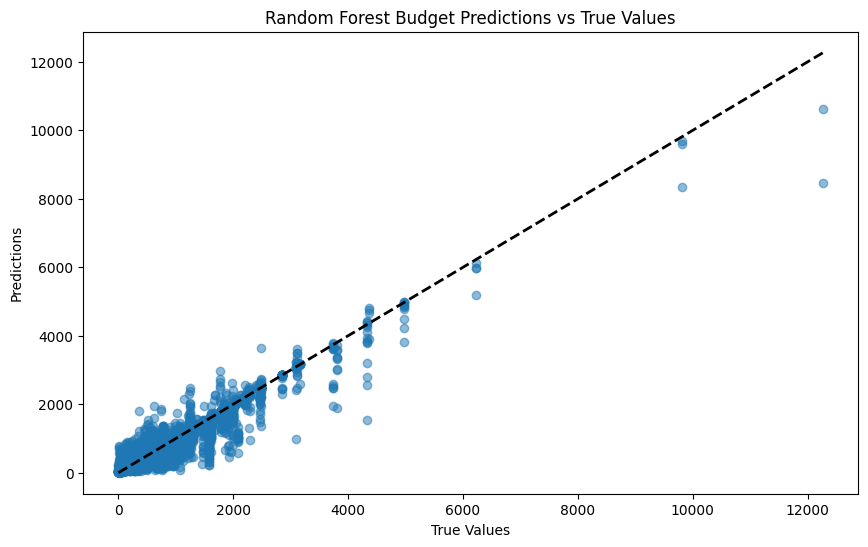

In [10]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2: {r2_rf}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Budget Predictions vs True Values')
plt.show()


Epoch 1/50


/Users/santi/Desktop/Proyecto/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - loss: 177736176.0000
Epoch 2/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - loss: 2100535.7500
Epoch 3/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - loss: 5556365.0000
Epoch 4/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - loss: 21624050.0000
Epoch 5/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - loss: 2697539.7500
Epoch 6/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - loss: 302577.4375
Epoch 7/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - loss: 1772549.6250
Epoch 8/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - loss: 10849227.0000
Epoch 9/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - loss: 4138829.0000
Epoch 10/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - loss: 1499490.6250
Epoch 11/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - loss: 2443774.7500
Epoch 12/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - loss: 1213849.0000
Epoch 13/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - loss: 799236.1250
Epoc

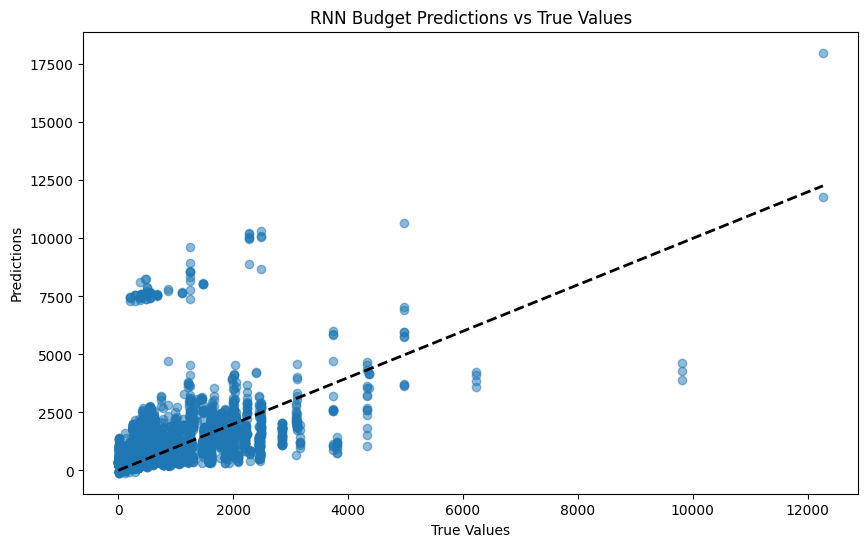

In [11]:
# RNN

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

X_train_rnn = X_train_rnn.astype('float32')
y_train = y_train.astype('float32')
X_test_rnn = X_test_rnn.astype('float32')
y_test = y_test.astype('float32')
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred_rnn = rnn.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN MSE: {mse_rnn}')

r2_rnn = r2_score(y_test, y_pred_rnn)
print(f'RNN R^2: {r2_rnn}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RNN Budget Predictions vs True Values')
plt.show()

SVR MSE: 367000.44033471425
SVR R^2: -0.052369480880178676


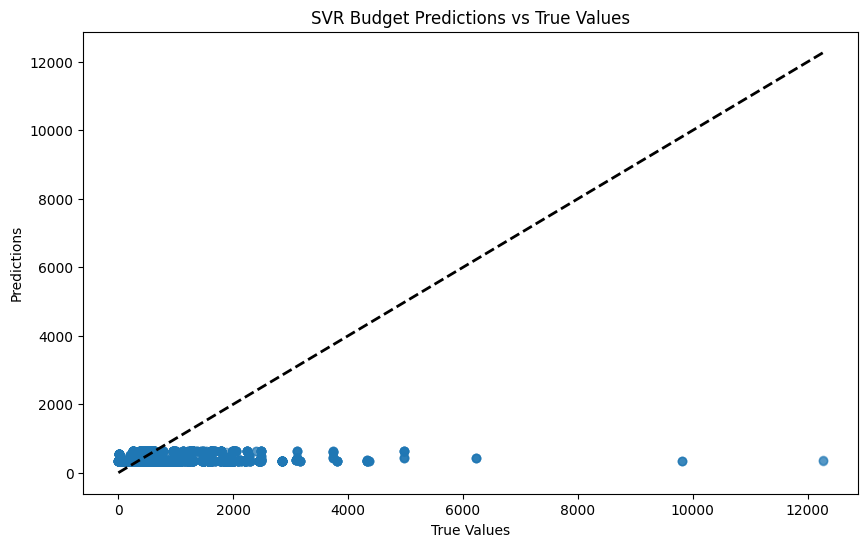

In [12]:
# SVR
from sklearn.svm import SVR

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}')
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR R^2: {r2_svr}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Budget Predictions vs True Values')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 55104, number of used features: 18
[LightGBM] [Info] Start training from score 532.107544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

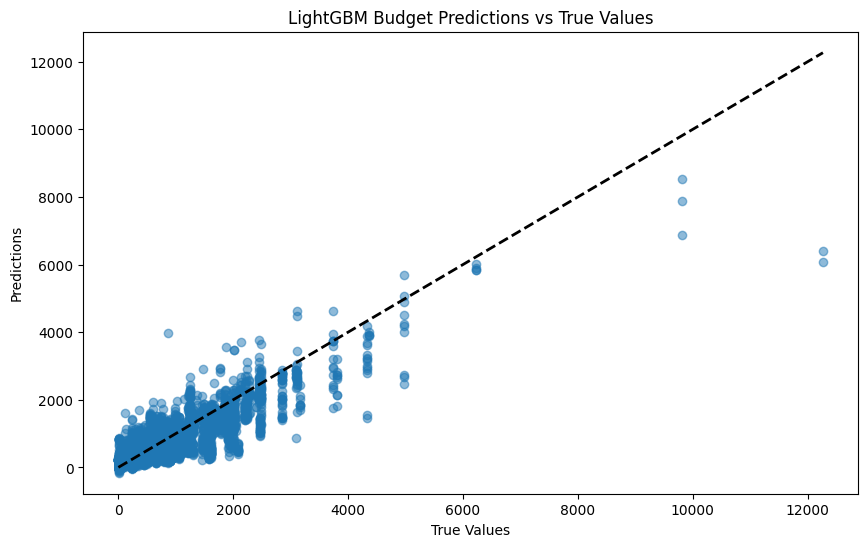

In [13]:
# LightGBM
import lightgbm as lgb

# Initialize and train the model
lgb_reg = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)
lgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM R^2: {r2_lgb}')

#plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LightGBM Budget Predictions vs True Values')
plt.show()

In [14]:
# Calculate RMSE for each model
rmse_rf = mse_rf ** 0.5
rmse_rnn = mse_rnn ** 0.5
rmse_svr = mse_svr ** 0.5
rmse_lgb = mse_lgb ** 0.5

# Create a DataFrame to store the results
metrics = pd.DataFrame({
    'Model': ['Random Forest Budget', 'RNN Budget', 'SVR Budget', 'LightGBM Budget'],
    'RMSE': [rmse_rf, rmse_rnn, rmse_svr, rmse_lgb],
    'R^2': [r2_rf, r2_rnn, r2_svr, r2_lgb]
})

# Save the metrics to a CSV file
metrics.to_csv('./Model_Metrics.csv', index=False)


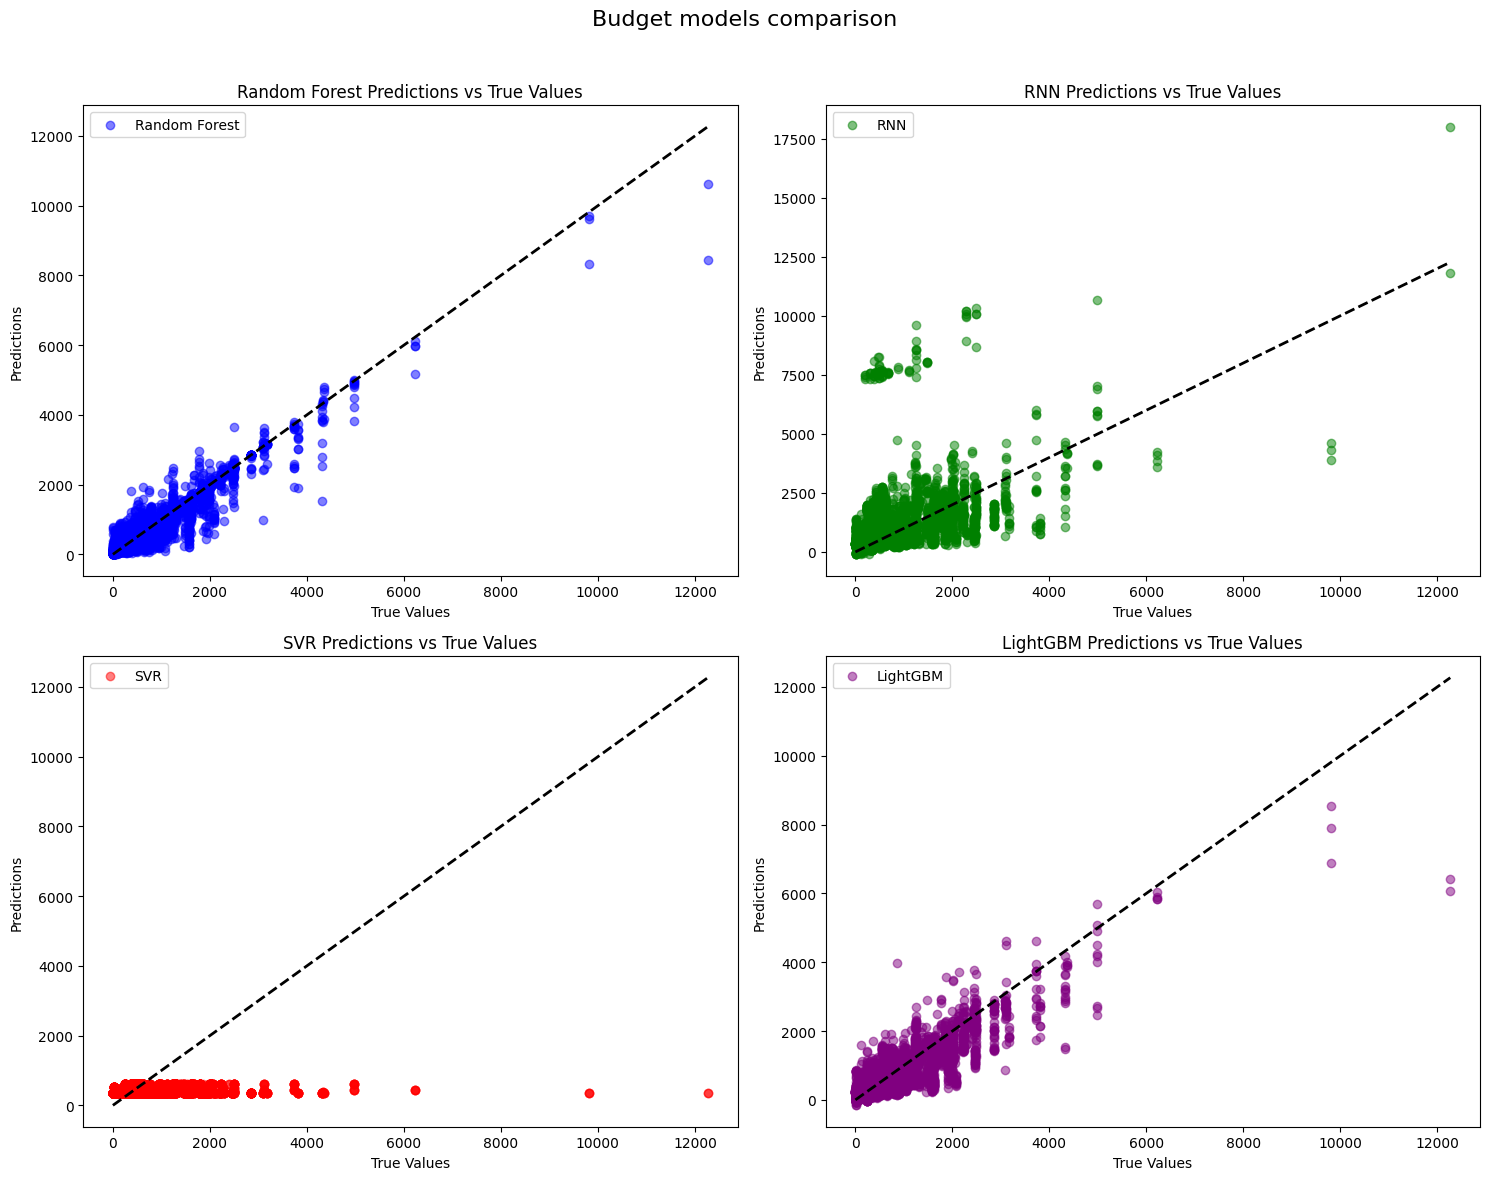

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest
axes[0, 0].scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predictions')
axes[0, 0].set_title('Random Forest Predictions vs True Values')
axes[0, 0].legend()

# RNN
axes[0, 1].scatter(y_test, y_pred_rnn, color='green', alpha=0.5, label='RNN')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Predictions')
axes[0, 1].set_title('RNN Predictions vs True Values')
axes[0, 1].legend()

# SVR
axes[1, 0].scatter(y_test, y_pred_svr, color='red', alpha=0.5, label='SVR')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predictions')
axes[1, 0].set_title('SVR Predictions vs True Values')
axes[1, 0].legend()

# LightGBM
axes[1, 1].scatter(y_test, y_pred_lgb, color='purple', alpha=0.5, label='LightGBM')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_xlabel('True Values')
axes[1, 1].set_ylabel('Predictions')
axes[1, 1].set_title('LightGBM Predictions vs True Values')
axes[1, 1].legend()

# Add the main title
fig.suptitle('Budget models comparison', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

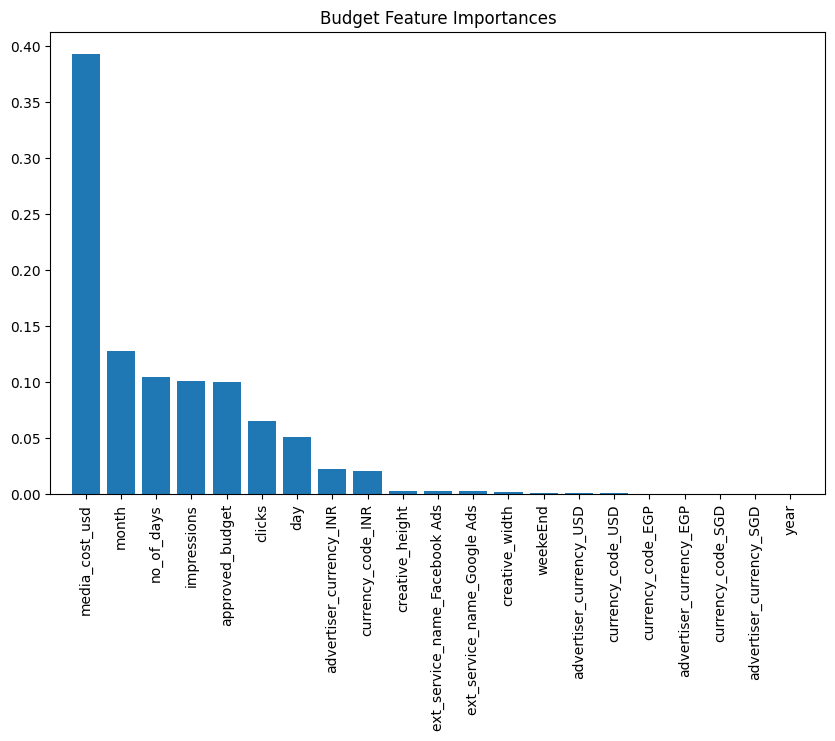

In [16]:
# variable importance random forest
importances_budget = rf.feature_importances_
indices = np.argsort(importances_budget)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Budget Feature Importances")
plt.bar(range(X_train.shape[1]), importances_budget[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicting Impressions

In [17]:
X_train = X_train_impression
X_test = X_test_impression
y_train = y_train_impression
y_test = y_test_impression

 Random Forest MSE: 203867.73175307052
Random Forest R^2: 0.9726360831208117


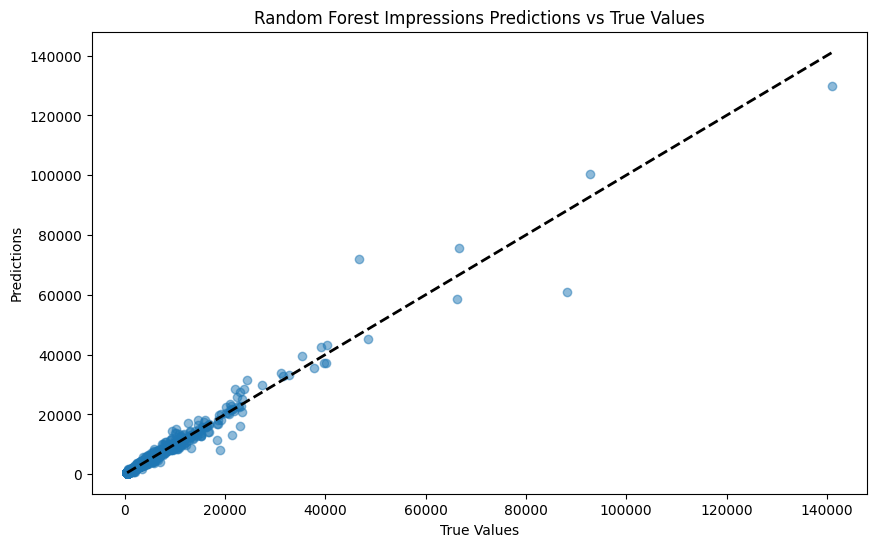

In [18]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f' Random Forest MSE: {mse_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2: {r2_rf}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Impressions Predictions vs True Values')
plt.show()

Epoch 1/50


/Users/santi/Desktop/Proyecto/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - loss: 98692800.0000
Epoch 2/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - loss: 4918925.5000
Epoch 3/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - loss: 9003438.0000
Epoch 4/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 3516531.7500
Epoch 5/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - loss: 8203495.0000
Epoch 6/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - loss: 5420555.0000
Epoch 7/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - loss: 4655089.0000
Epoch 8/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - loss: 5287037.0000
Epoch 9/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - loss: 4910385.0000
Epoch 10/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - loss: 2548794.0000
Epoch 11/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - loss: 2753831.2500
Epoch 12/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 3208539.2500
Epoch 13/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - loss: 3111874.0000
Epoch

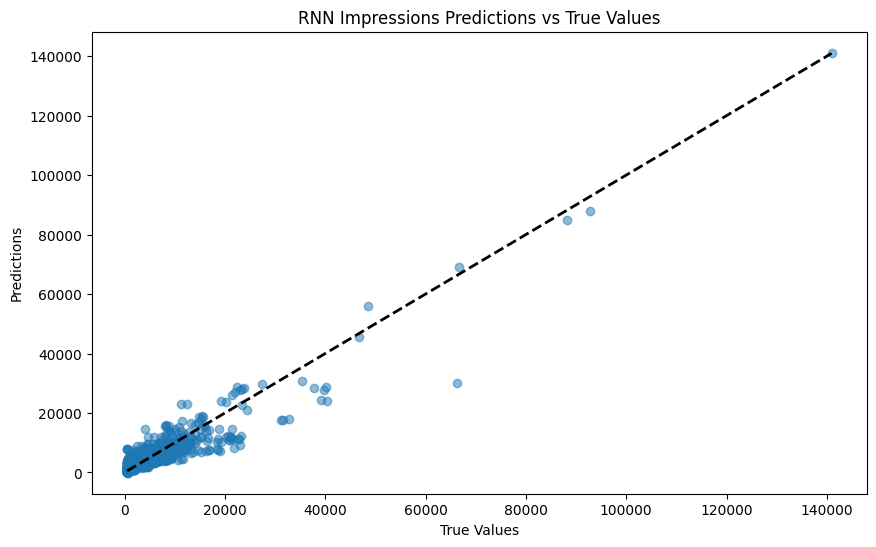

In [19]:
# RNN

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

X_train_rnn = X_train_rnn.astype('float32')
y_train = y_train.astype('float32')
X_test_rnn = X_test_rnn.astype('float32')
y_test = y_test.astype('float32')
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred_rnn = rnn.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN MSE: {mse_rnn}')

r2_rnn = r2_score(y_test, y_pred_rnn)
print(f'RNN R^2: {r2_rnn}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RNN Impressions Predictions vs True Values')
plt.show()

SVR MSE: 6870996.65314368
SVR R^2: 0.07774820626573986


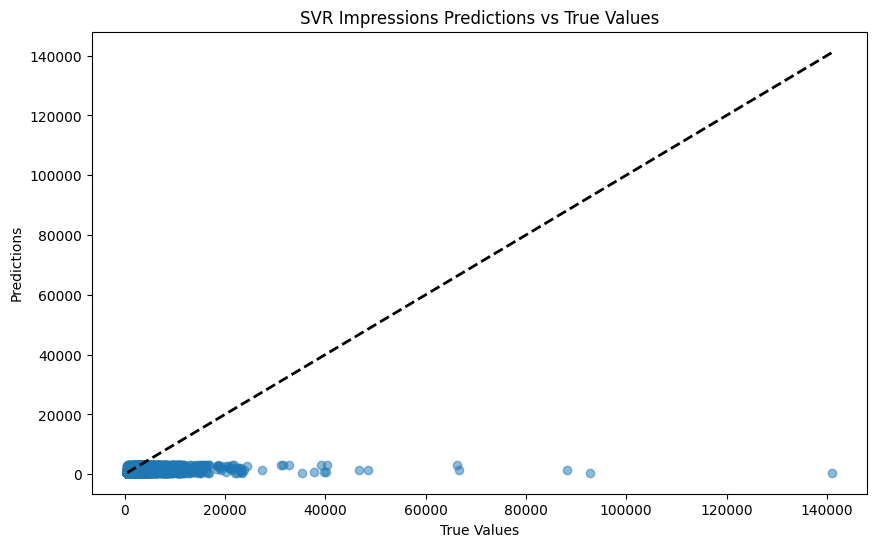

In [20]:
# SVR
from sklearn.svm import SVR

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}')
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR R^2: {r2_svr}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Impressions Predictions vs True Values')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 55104, number of used features: 18
[LightGBM] [Info] Start training from score 1127.295351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

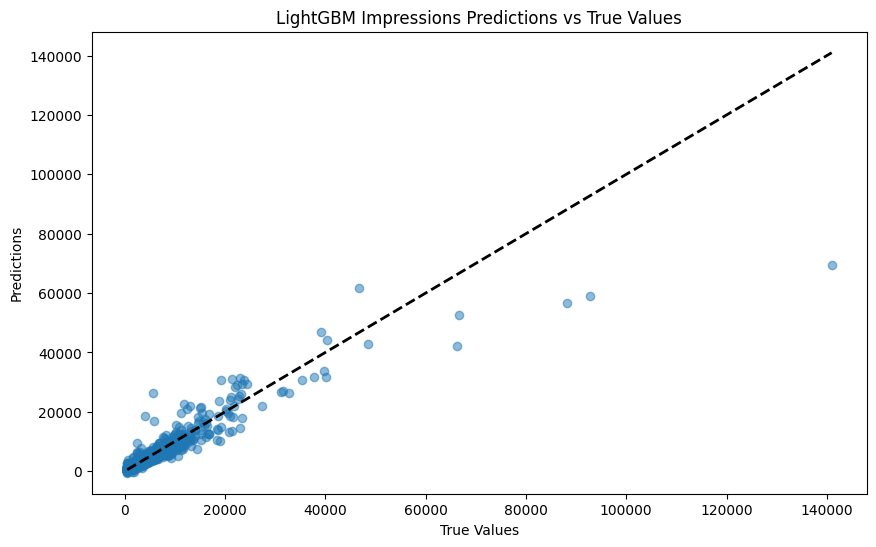

In [21]:
# LightGBM
import lightgbm as lgb

# Initialize and train the model
lgb_reg = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)
lgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM R^2: {r2_lgb}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LightGBM Impressions Predictions vs True Values')
plt.show()

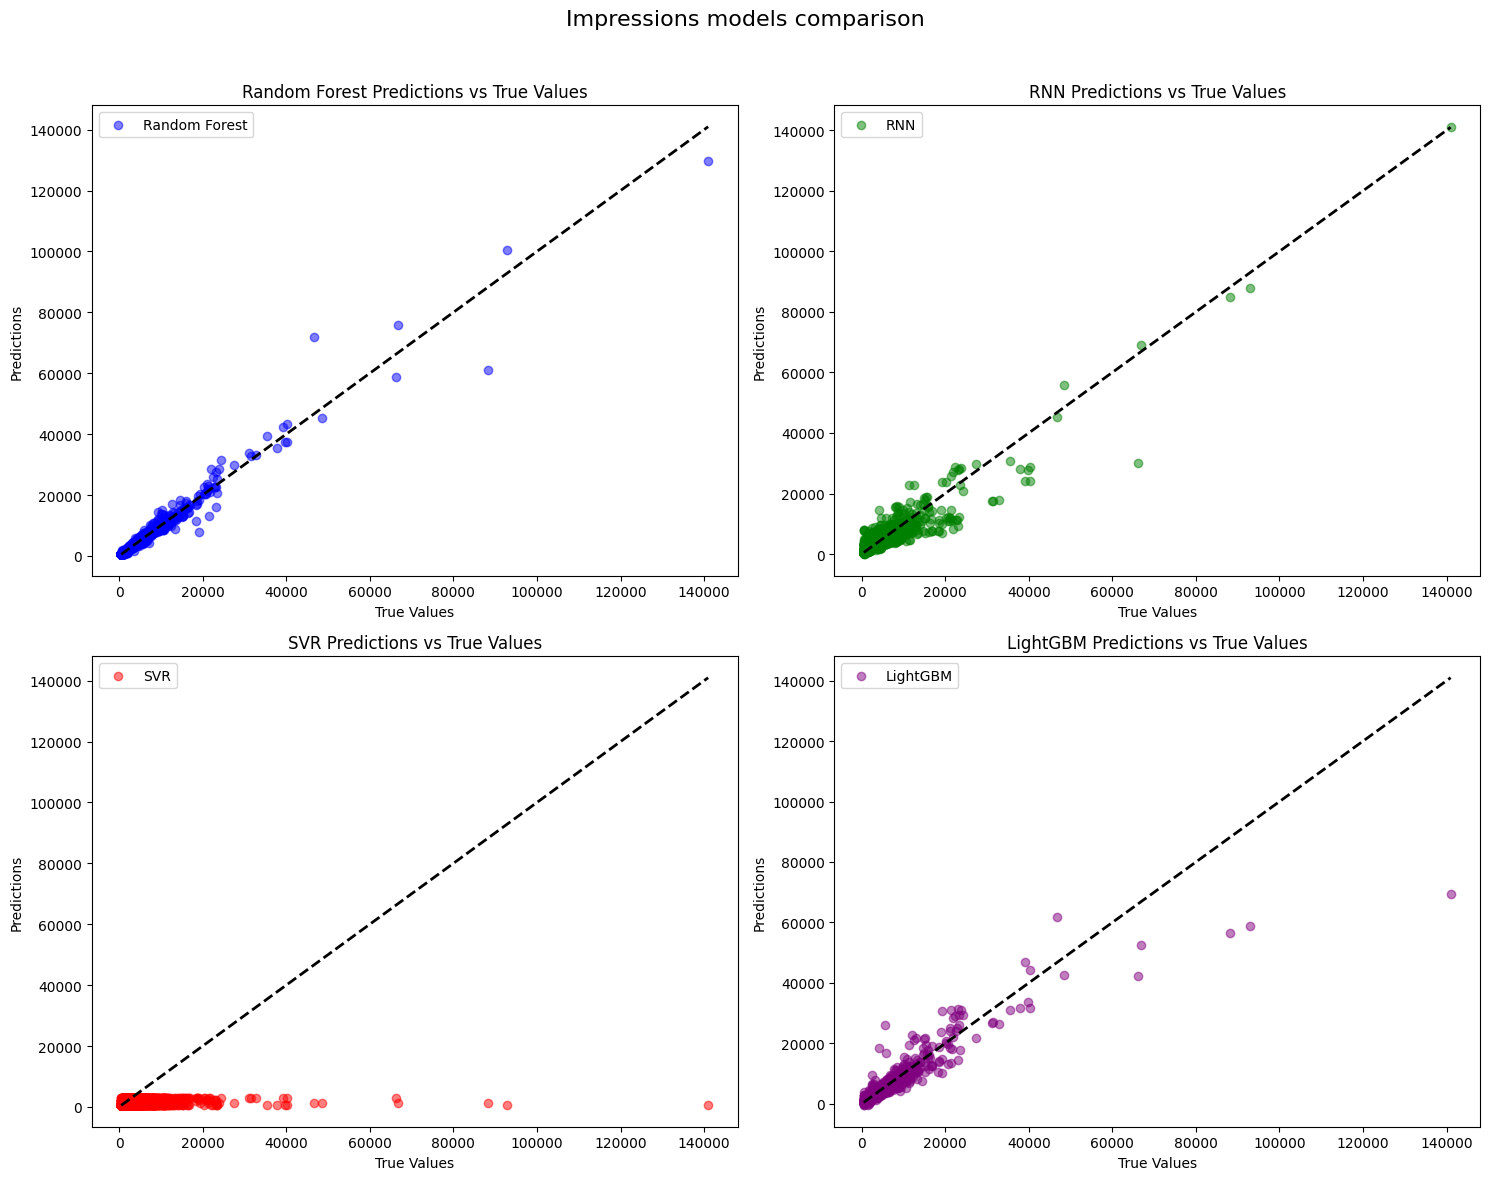

In [22]:
# plot all the predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Random Forest
axes[0, 0].scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predictions')
axes[0, 0].set_title('Random Forest Predictions vs True Values')
axes[0, 0].legend()
# RNN
axes[0, 1].scatter(y_test, y_pred_rnn, color='green', alpha=0.5, label='RNN')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Predictions')
axes[0, 1].set_title('RNN Predictions vs True Values')
axes[0, 1].legend()
# SVR
axes[1, 0].scatter(y_test, y_pred_svr, color='red', alpha=0.5, label='SVR')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predictions')
axes[1, 0].set_title('SVR Predictions vs True Values')
axes[1, 0].legend()
# LightGBM
axes[1, 1].scatter(y_test, y_pred_lgb, color='purple', alpha=0.5, label='LightGBM')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_xlabel('True Values')
axes[1, 1].set_ylabel('Predictions')
axes[1, 1].set_title('LightGBM Predictions vs True Values')
axes[1, 1].legend()
# Add the main title
fig.suptitle('Impressions models comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [23]:
# calculate RMSE for each model
rmse_rf = mse_rf ** 0.5
rmse_rnn = mse_rnn ** 0.5
rmse_svr = mse_svr ** 0.5
rmse_lgb = mse_lgb ** 0.5

# save the metrics to a CSV file
metrics = pd.DataFrame({
    'Model': ['Random Forest Impressions', 'RNN Impressions', 'SVR Impressions', 'LightGBM Impressions'],
    'RMSE': [rmse_rf, rmse_rnn, rmse_svr, rmse_lgb],
    'R^2': [r2_rf, r2_rnn, r2_svr, r2_lgb]
})
# add to existing CSV file
metrics.to_csv('./Model_Metrics.csv', mode='a', index=False, header=False)

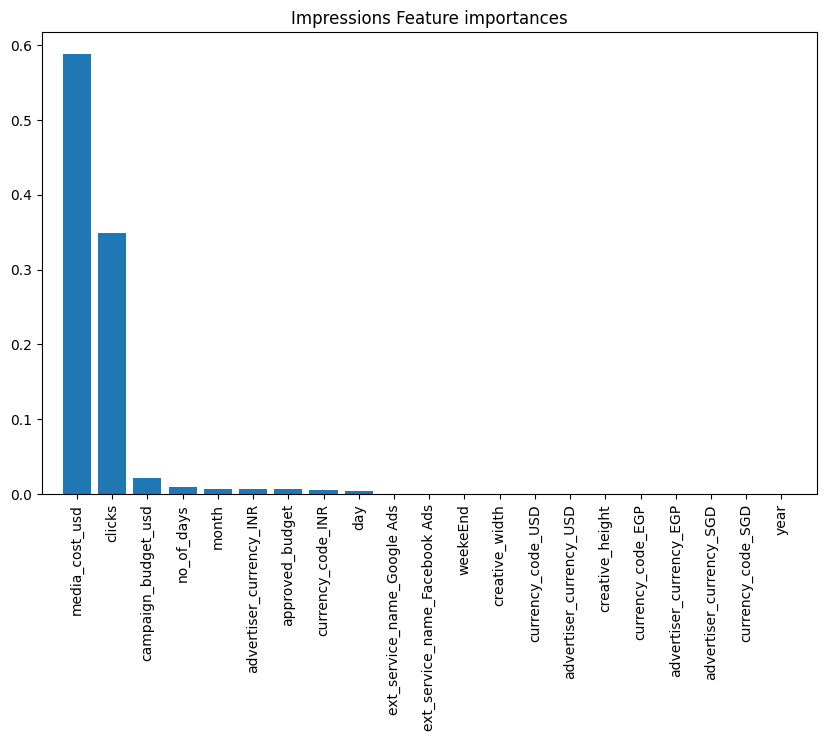

In [24]:
# variable importance random forest
importances_impressions = rf.feature_importances_
indices = np.argsort(importances_impressions)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Impressions Feature importances")
plt.bar(range(X_train.shape[1]), importances_impressions[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicting Clicks

In [25]:
X_train = X_train_clicks
X_test = X_test_clicks
y_train = y_train_clicks
y_test = y_test_clicks

Random Forest MSE: 8110.960041339211
Random Forest R^2: 0.7795614006676789


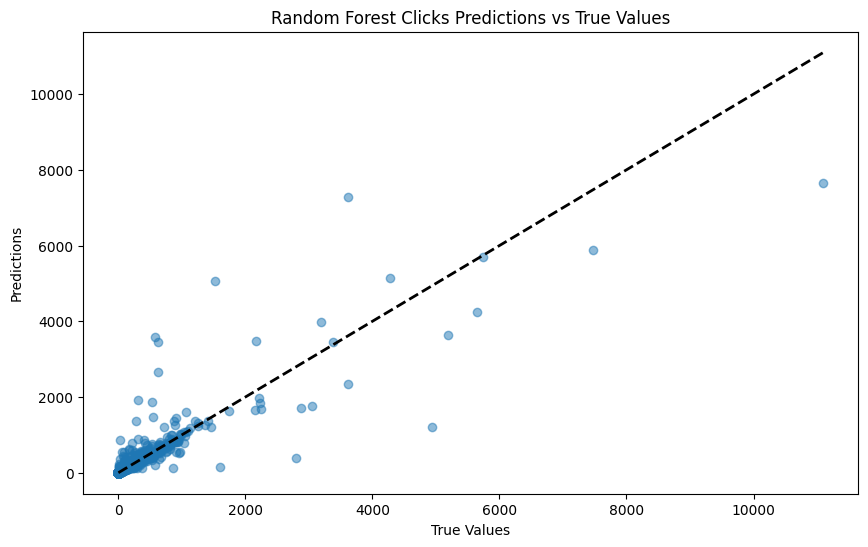

In [26]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2: {r2_rf}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Clicks Predictions vs True Values')
plt.show()


Epoch 1/50


/Users/santi/Desktop/Proyecto/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 68785424.0000
Epoch 2/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - loss: 4658332.5000
Epoch 3/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - loss: 24725178.0000
Epoch 4/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - loss: 16612945.0000
Epoch 5/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - loss: 5256910.0000
Epoch 6/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - loss: 18671624.0000
Epoch 7/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - loss: 180265.6562
Epoch 8/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - loss: 19477854.0000
Epoch 9/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - loss: 1897089.6250
Epoch 10/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - loss: 550611.5000
Epoch 11/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - loss: 6012884.0000
Epoch 12/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - loss: 3449792.7500
Epoch 13/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 6224077.0000
Epo

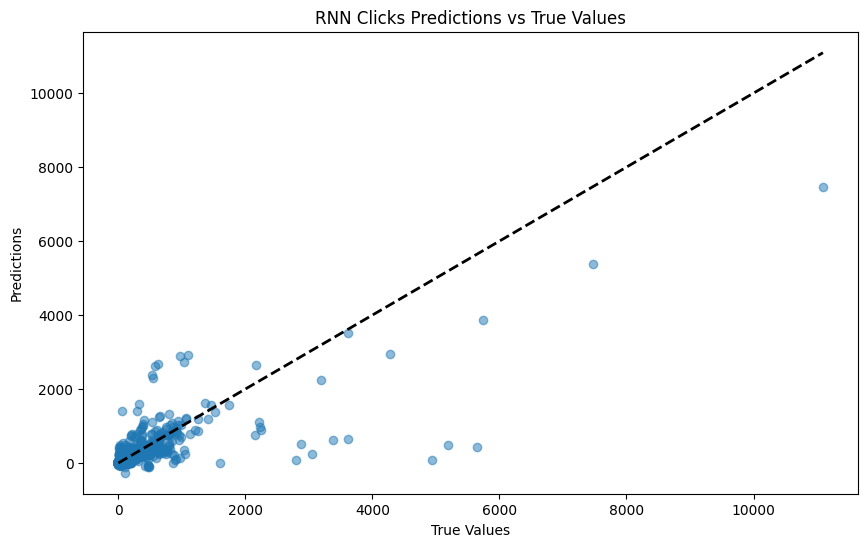

In [27]:
# RNN

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

X_train_rnn = X_train_rnn.astype('float32')
y_train = y_train.astype('float32')
X_test_rnn = X_test_rnn.astype('float32')
y_test = y_test.astype('float32')
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred_rnn = rnn.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN MSE: {mse_rnn}')

r2_rnn = r2_score(y_test, y_pred_rnn)
print(f'RNN R^2: {r2_rnn}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RNN Clicks Predictions vs True Values')
plt.show()

SVR MSE: 35318.09438202734
SVR R^2: 0.0401295016890062


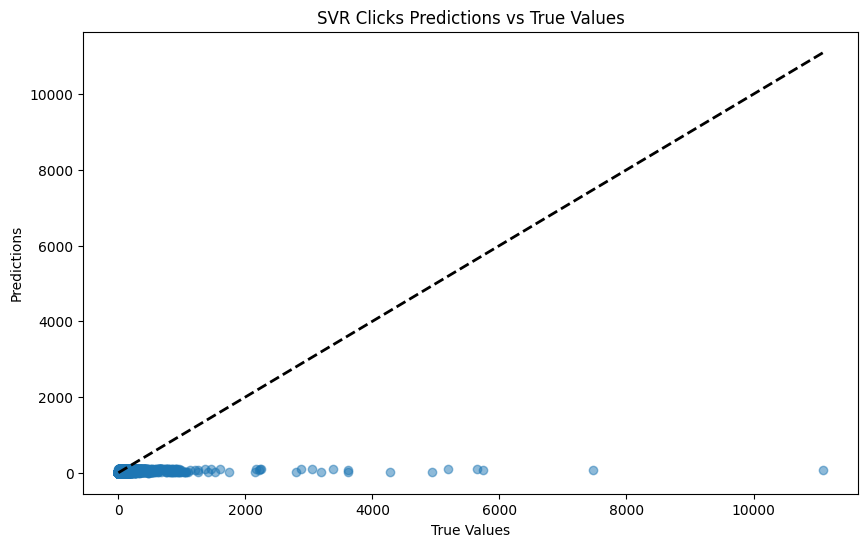

In [28]:
# SVR
from sklearn.svm import SVR

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}')
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR R^2: {r2_svr}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Clicks Predictions vs True Values')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 55104, number of used features: 18
[LightGBM] [Info] Start training from score 33.488912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

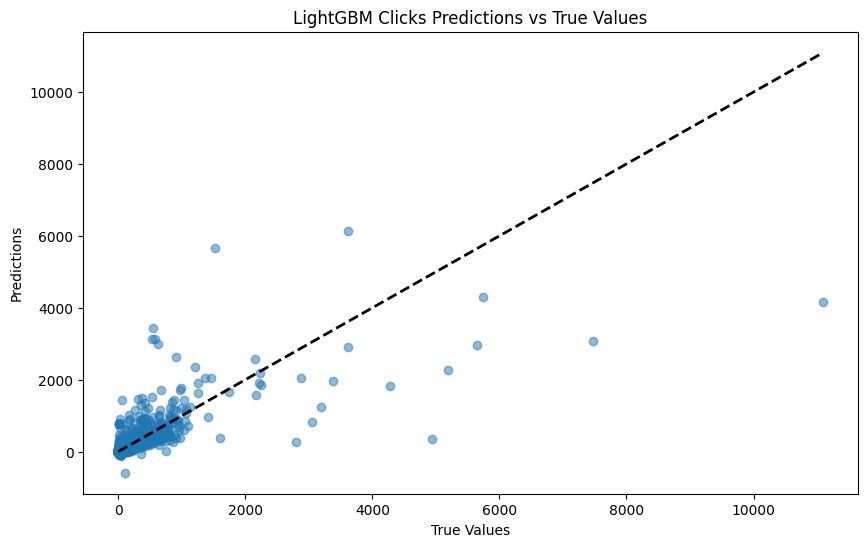

In [29]:
# LightGBM
import lightgbm as lgb

# Initialize and train the model
lgb_reg = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)
lgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM R^2: {r2_lgb}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LightGBM Clicks Predictions vs True Values')
plt.show()

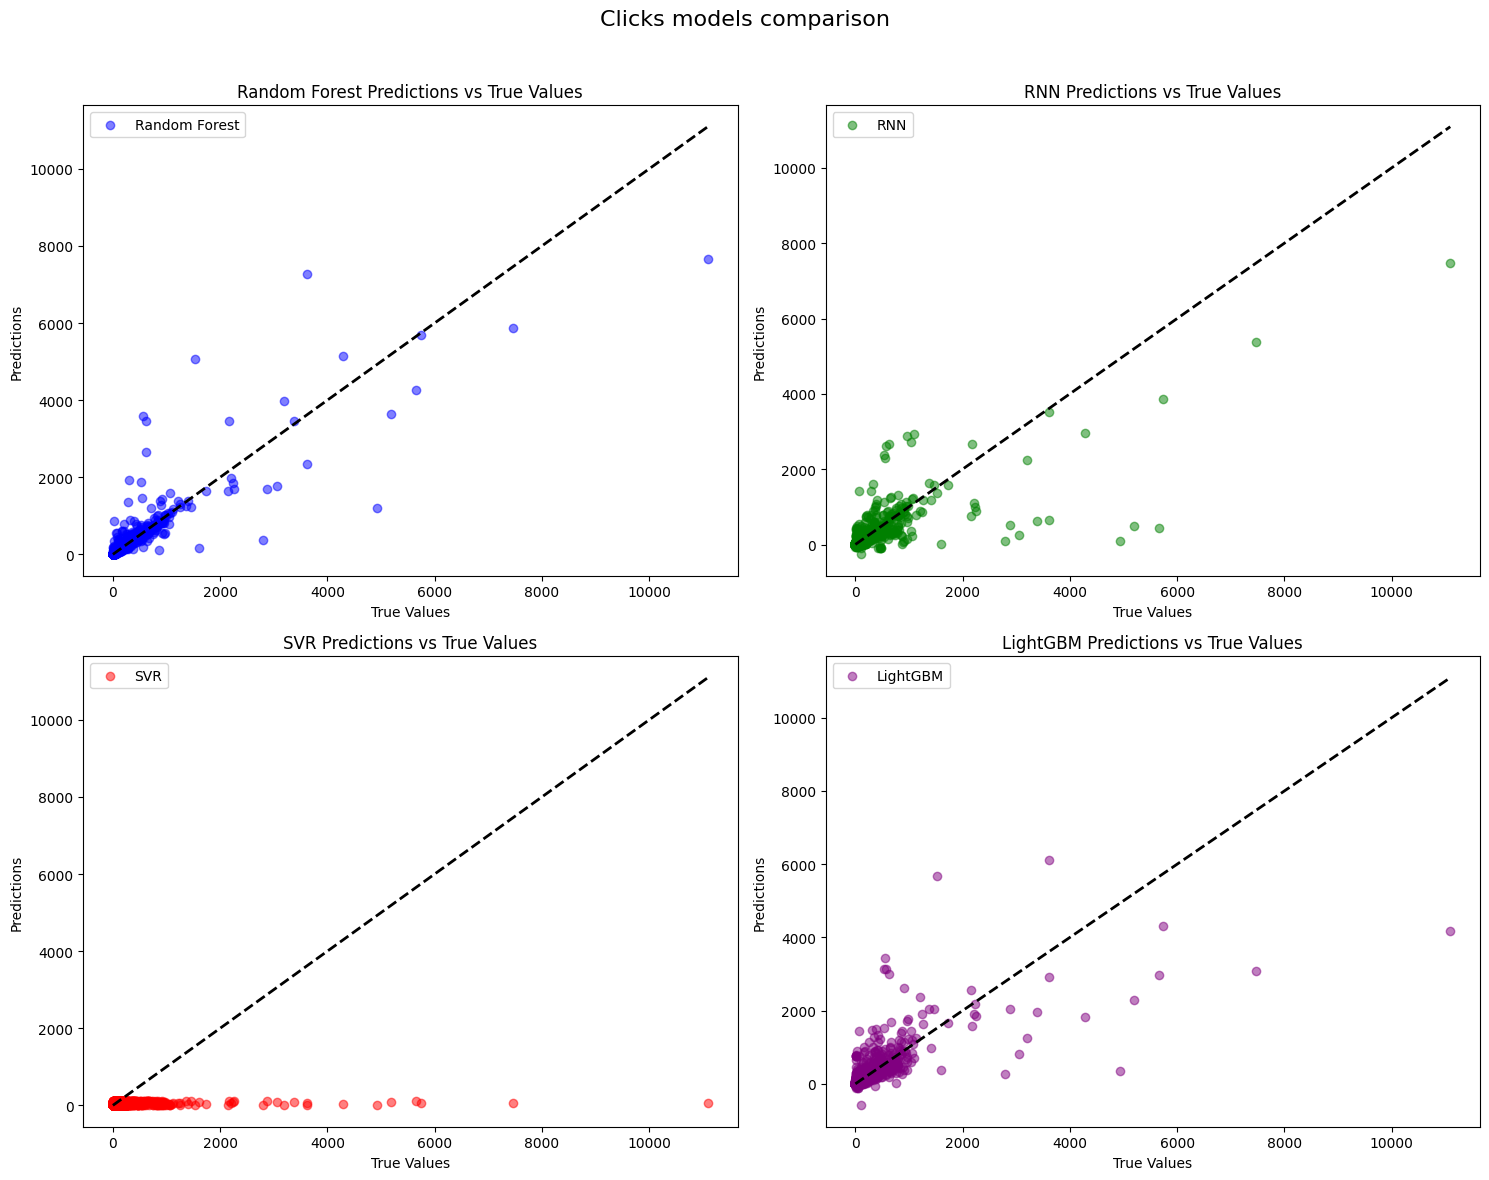

In [30]:
# plot the predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Random Forest
axes[0, 0].scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predictions')
axes[0, 0].set_title('Random Forest Predictions vs True Values')
axes[0, 0].legend()
# RNN
axes[0, 1].scatter(y_test, y_pred_rnn, color='green', alpha=0.5, label='RNN')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Predictions')
axes[0, 1].set_title('RNN Predictions vs True Values')
axes[0, 1].legend()
# SVR
axes[1, 0].scatter(y_test, y_pred_svr, color='red', alpha=0.5, label='SVR')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predictions')
axes[1, 0].set_title('SVR Predictions vs True Values')
axes[1, 0].legend()
# LightGBM
axes[1, 1].scatter(y_test, y_pred_lgb, color='purple', alpha=0.5, label='LightGBM')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_xlabel('True Values')
axes[1, 1].set_ylabel('Predictions')
axes[1, 1].set_title('LightGBM Predictions vs True Values')
axes[1, 1].legend()
# Add the main title
fig.suptitle('Clicks models comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [31]:
# calculate RMSE for each model
rmse_rf = mse_rf ** 0.5
rmse_rnn = mse_rnn ** 0.5
rmse_svr = mse_svr ** 0.5
rmse_lgb = mse_lgb ** 0.5
# create a DataFrame to store the results
metrics = pd.DataFrame({
    'Model': ['Random Forest Clicks', 'RNN Clicks', 'SVR Clicks', 'LightGBM Clicks'],
    'RMSE': [rmse_rf, rmse_rnn, rmse_svr, rmse_lgb],
    'R^2': [r2_rf, r2_rnn, r2_svr, r2_lgb]
})
# save the metrics to existing CSV file
metrics.to_csv('./Model_Metrics.csv', mode='a', index=False, header=False)


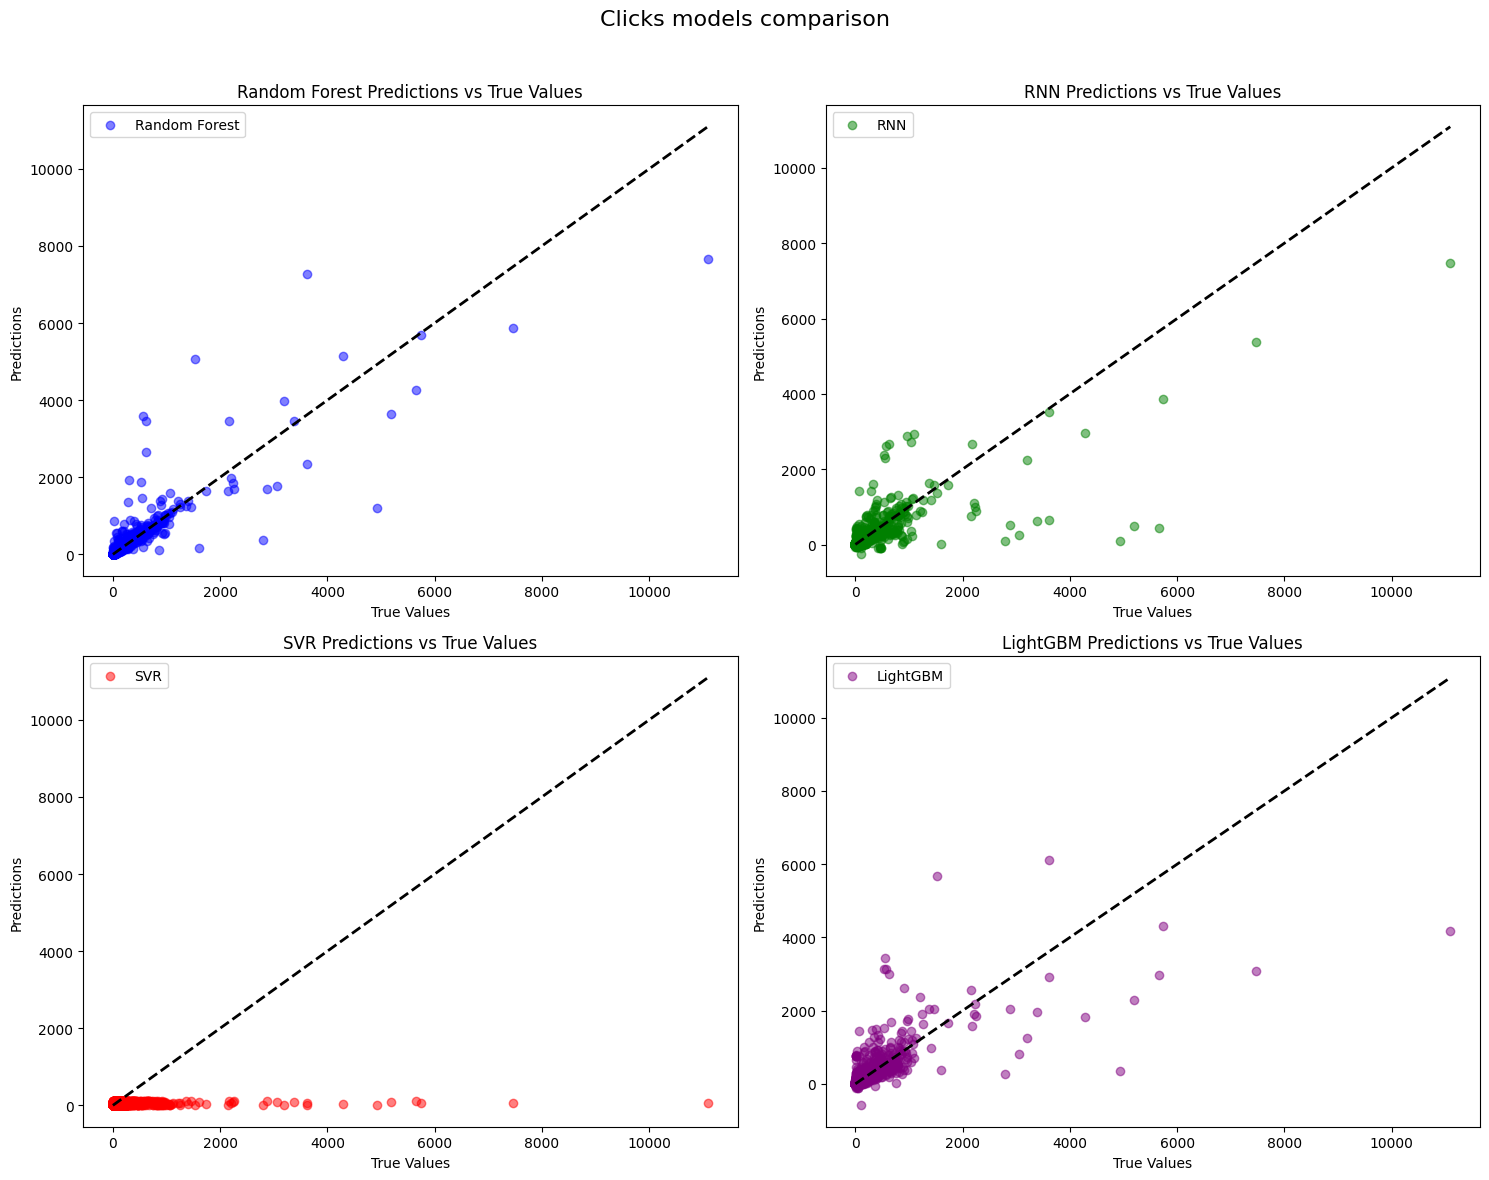

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest
axes[0, 0].scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predictions')
axes[0, 0].set_title('Random Forest Predictions vs True Values')
axes[0, 0].legend()

# RNN
axes[0, 1].scatter(y_test, y_pred_rnn, color='green', alpha=0.5, label='RNN')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Predictions')
axes[0, 1].set_title('RNN Predictions vs True Values')
axes[0, 1].legend()

# SVR
axes[1, 0].scatter(y_test, y_pred_svr, color='red', alpha=0.5, label='SVR')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predictions')
axes[1, 0].set_title('SVR Predictions vs True Values')
axes[1, 0].legend()

# LightGBM
axes[1, 1].scatter(y_test, y_pred_lgb, color='purple', alpha=0.5, label='LightGBM')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_xlabel('True Values')
axes[1, 1].set_ylabel('Predictions')
axes[1, 1].set_title('LightGBM Predictions vs True Values')
axes[1, 1].legend()

# Add the main title
fig.suptitle('Clicks models comparison', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

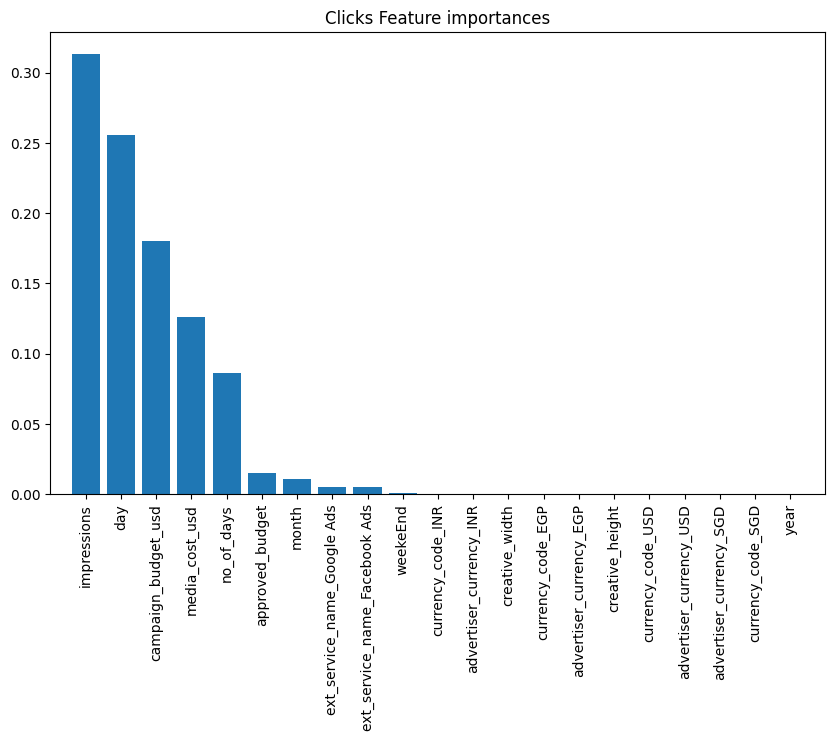

In [33]:
# variable importance random forest
importances_clicks = rf.feature_importances_
indices = np.argsort(importances_clicks)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Clicks Feature importances")
plt.bar(range(X_train.shape[1]), importances_clicks[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicting Media Cost ($)

In [34]:
X_train = X_train_media_cost_usd
X_test = X_test_media_cost_usd
y_train = y_train_media_cost_usd
y_test = y_test_media_cost_usd

Random Forest MSE: 17.578946335901556
Random Forest R^2: 0.9794667467638998


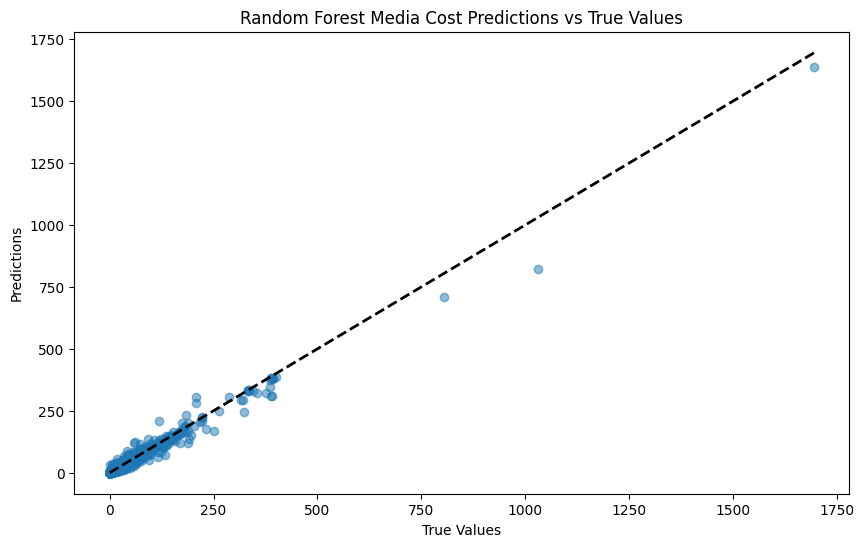

In [35]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2: {r2_rf}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Media Cost Predictions vs True Values')
plt.show()

Epoch 1/50


/Users/santi/Desktop/Proyecto/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 73611632.0000
Epoch 2/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - loss: 1137597.3750
Epoch 3/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 1322646.5000
Epoch 4/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - loss: 9696406.0000
Epoch 5/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - loss: 3999451.7500
Epoch 6/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 1030.2032
Epoch 7/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - loss: 3098559.0000
Epoch 8/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 3012.4548
Epoch 9/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - loss: 1824651.3750
Epoch 10/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 616122.2500
Epoch 11/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - loss: 22299708.0000
Epoch 12/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - loss: 126891.7266
Epoch 13/50
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 882699.3125
Epoch 14/50
1

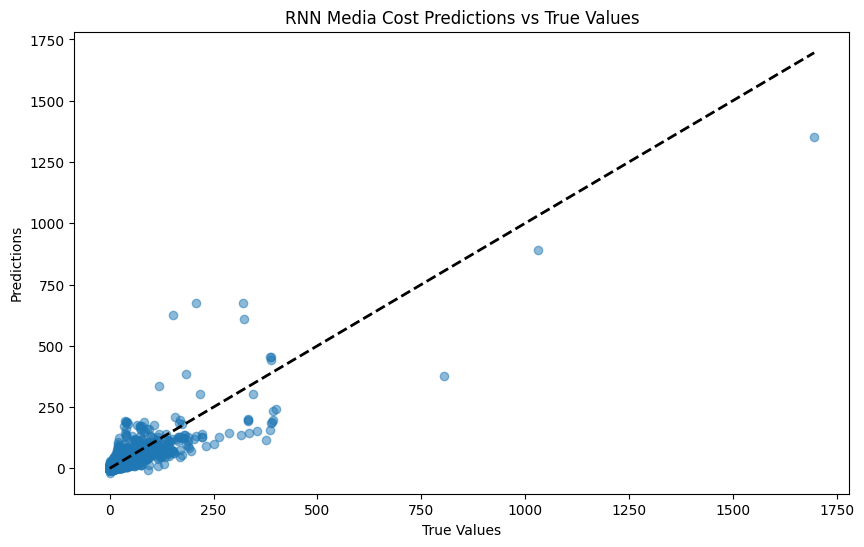

In [36]:
# RNN

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

X_train_rnn = X_train_rnn.astype('float32')
y_train = y_train.astype('float32')
X_test_rnn = X_test_rnn.astype('float32')
y_test = y_test.astype('float32')
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred_rnn = rnn.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN MSE: {mse_rnn}')

r2_rnn = r2_score(y_test, y_pred_rnn)
print(f'RNN R^2: {r2_rnn}')
# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RNN Media Cost Predictions vs True Values')
plt.show()

SVR MSE: 770.1692109580182
SVR R^2: 0.10039663394230902


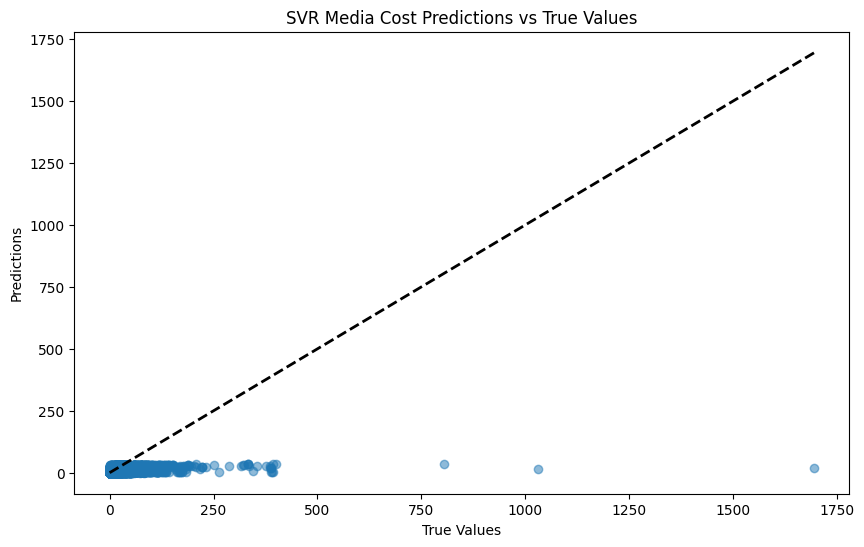

In [37]:
# SVR
from sklearn.svm import SVR

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}')
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR R^2: {r2_svr}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Media Cost Predictions vs True Values')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 55104, number of used features: 18
[LightGBM] [Info] Start training from score 8.825605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

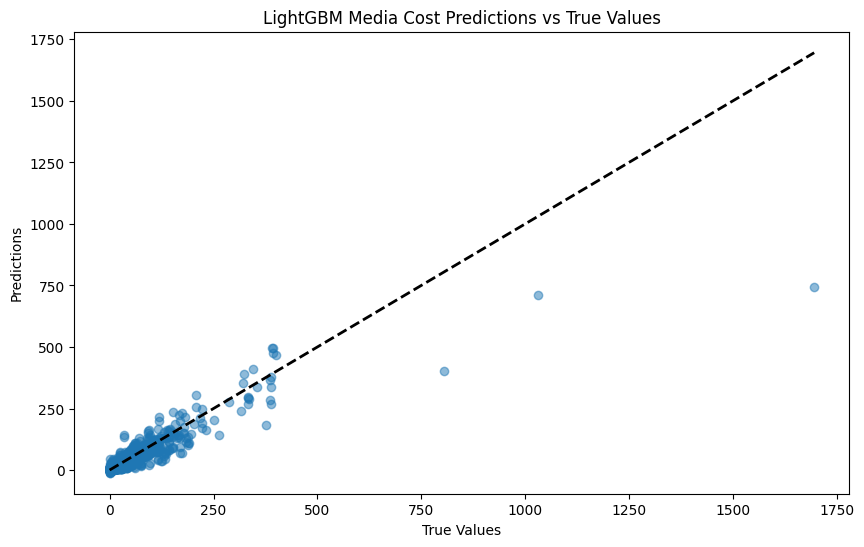

In [38]:
# LightGBM
import lightgbm as lgb

# Initialize and train the model
lgb_reg = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)
lgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM R^2: {r2_lgb}')

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LightGBM Media Cost Predictions vs True Values')
plt.show()

In [39]:
# calculate RMSE for each model
rmse_rf = mse_rf ** 0.5
rmse_rnn = mse_rnn ** 0.5
rmse_svr = mse_svr ** 0.5
rmse_lgb = mse_lgb ** 0.5
# create a DataFrame to store the results
metrics = pd.DataFrame({
    'Model': ['Random Forest Media Cost', 'RNN Media Cost', 'SVR Media Cost', 'LightGBM Media Cost'],
    'RMSE': [rmse_rf, rmse_rnn, rmse_svr, rmse_lgb],
    'R^2': [r2_rf, r2_rnn, r2_svr, r2_lgb]
})
# save the metrics to an existing CSV file
metrics.to_csv('./Model_Metrics.csv', mode='a', header=False, index=False)

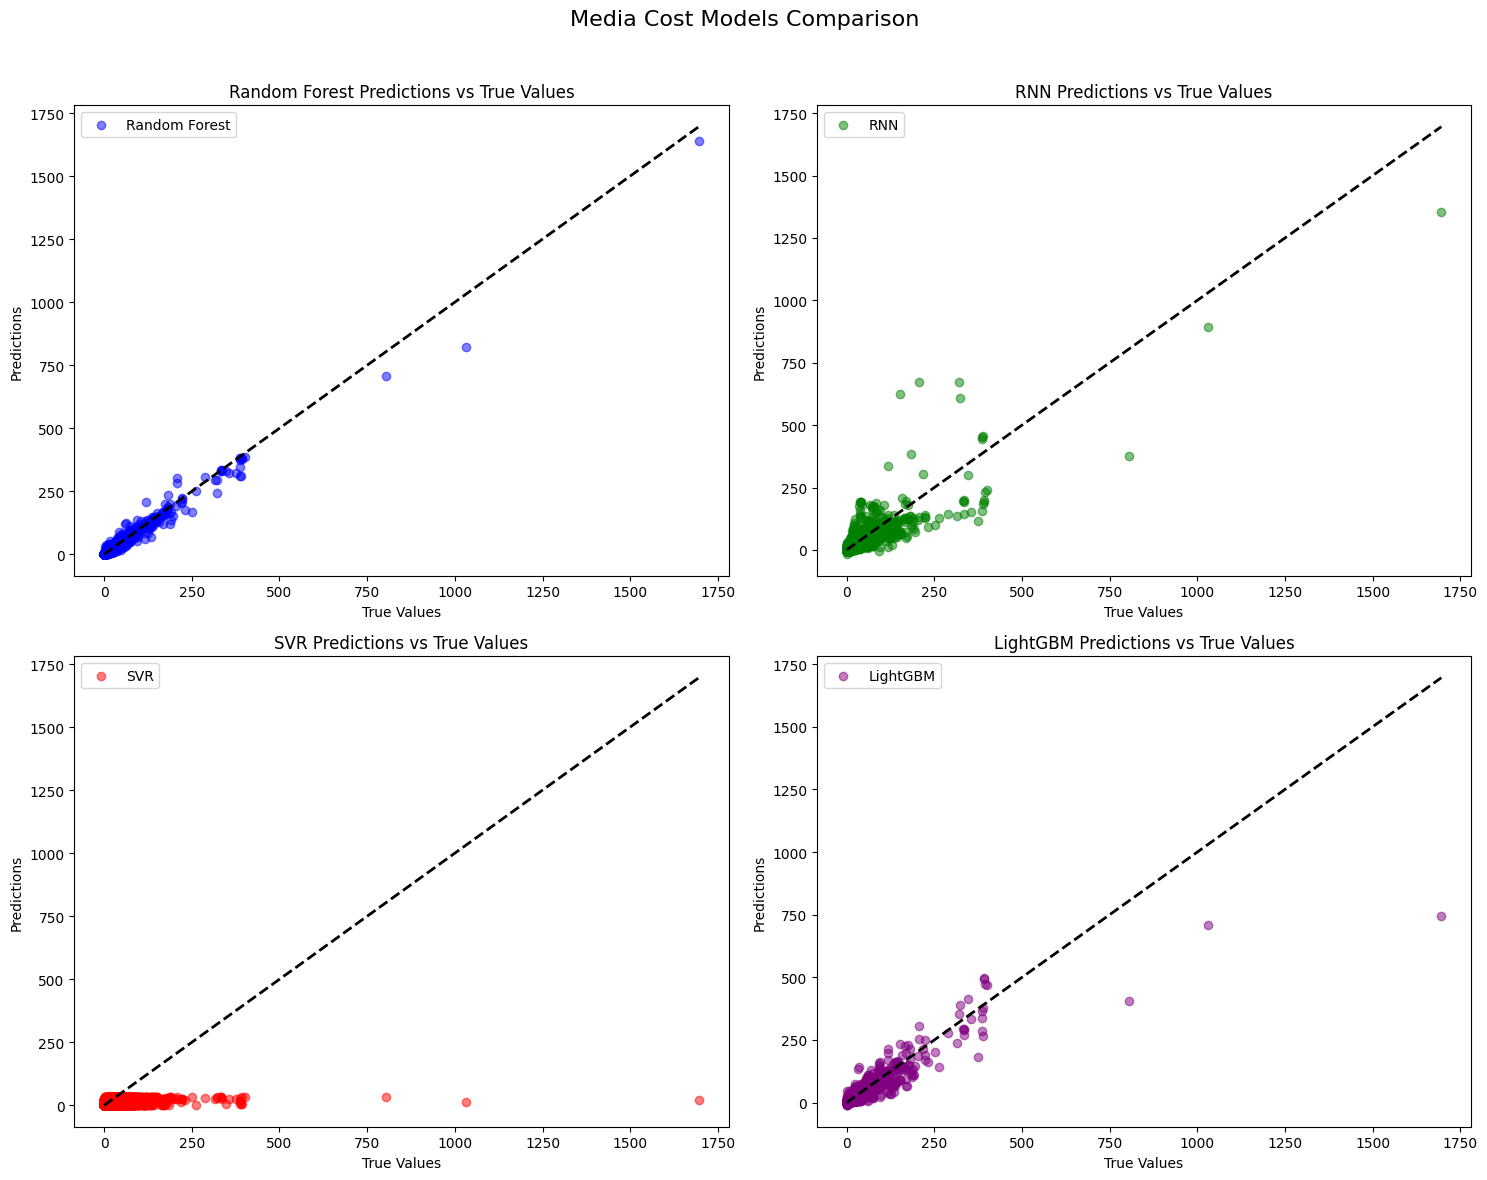

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest
axes[0, 0].scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Random Forest')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predictions')
axes[0, 0].set_title('Random Forest Predictions vs True Values')
axes[0, 0].legend()

# RNN
axes[0, 1].scatter(y_test, y_pred_rnn, color='green', alpha=0.5, label='RNN')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Predictions')
axes[0, 1].set_title('RNN Predictions vs True Values')
axes[0, 1].legend()

# SVR
axes[1, 0].scatter(y_test, y_pred_svr, color='red', alpha=0.5, label='SVR')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('True Values')
axes[1, 0].set_ylabel('Predictions')
axes[1, 0].set_title('SVR Predictions vs True Values')
axes[1, 0].legend()

# LightGBM
axes[1, 1].scatter(y_test, y_pred_lgb, color='purple', alpha=0.5, label='LightGBM')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 1].set_xlabel('True Values')
axes[1, 1].set_ylabel('Predictions')
axes[1, 1].set_title('LightGBM Predictions vs True Values')
axes[1, 1].legend()

# Add the main title
fig.suptitle('Media Cost Models Comparison', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

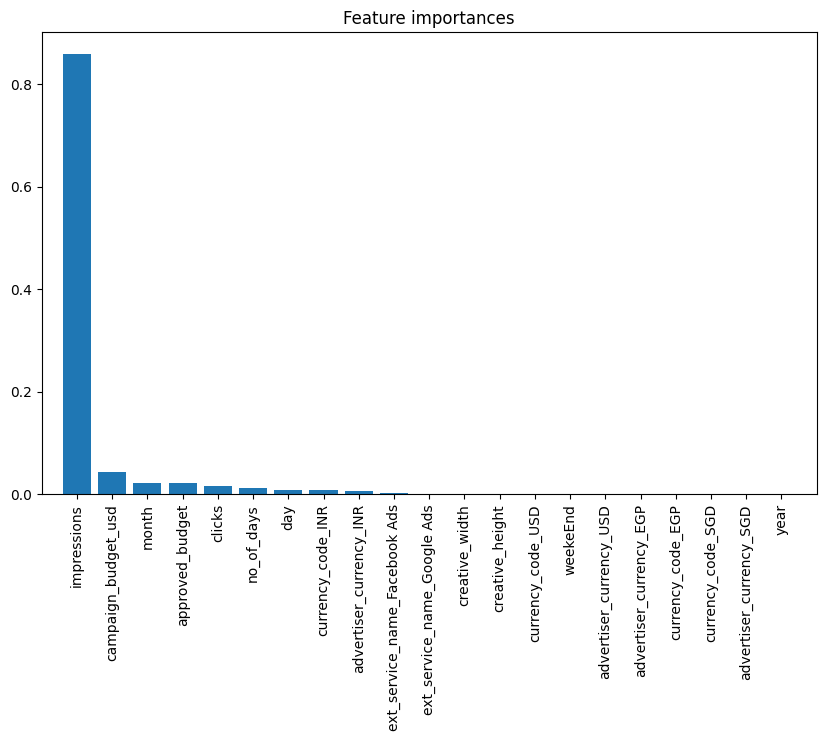

In [41]:
# variable importance random forest
importances_mediaCost = rf.feature_importances_
indices = np.argsort(importances_mediaCost)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances_mediaCost[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

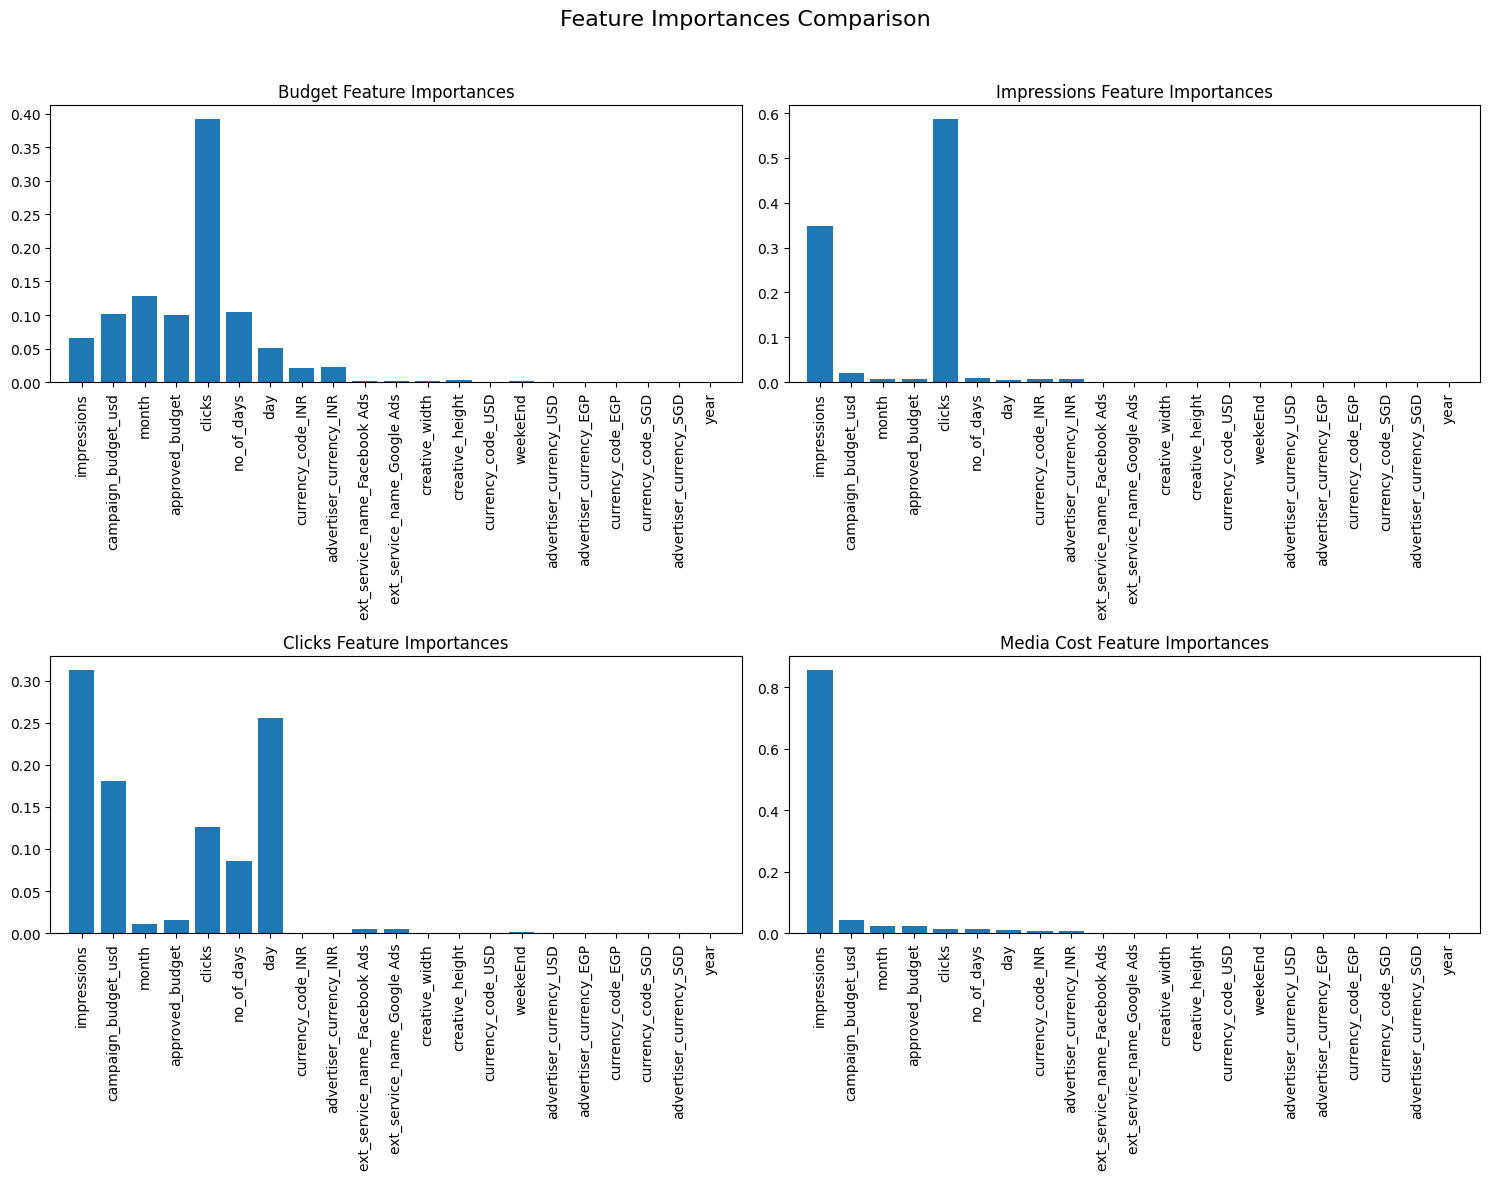

In [42]:
# subplot of all variable importances
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Budget
axes[0, 0].bar(range(X_train.shape[1]), importances_budget[indices], align="center")
axes[0, 0].set_title("Budget Feature Importances")
axes[0, 0].set_xticks(range(X_train.shape[1]))
axes[0, 0].set_xticklabels(features[indices], rotation=90)
axes[0, 0].set_xlim([-1, X_train.shape[1]])

# Impressions
axes[0, 1].bar(range(X_train.shape[1]), importances_impressions[indices], align="center")
axes[0, 1].set_title("Impressions Feature Importances")
axes[0, 1].set_xticks(range(X_train.shape[1]))
axes[0, 1].set_xticklabels(features[indices], rotation=90)
axes[0, 1].set_xlim([-1, X_train.shape[1]])

# Clicks
axes[1, 0].bar(range(X_train.shape[1]), importances_clicks[indices], align="center")
axes[1, 0].set_title("Clicks Feature Importances")
axes[1, 0].set_xticks(range(X_train.shape[1]))
axes[1, 0].set_xticklabels(features[indices], rotation=90)
axes[1, 0].set_xlim([-1, X_train.shape[1]])

# Media Cost
axes[1, 1].bar(range(X_train.shape[1]), importances_mediaCost[indices], align="center")
axes[1, 1].set_title("Media Cost Feature Importances")
axes[1, 1].set_xticks(range(X_train.shape[1]))
axes[1, 1].set_xticklabels(features[indices], rotation=90)
axes[1, 1].set_xlim([-1, X_train.shape[1]])

# Add the main title
fig.suptitle('Feature Importances Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
